In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

# Scikit Learn
import sklearn
sklearn.set_config(display='diagram')
from sklearn.preprocessing import StandardScaler, PowerTransformer, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet  
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.feature_selection import SelectKBest, f_regression

sns.set_style()
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (16, 9)

from IPython import get_ipython
ipython = get_ipython()

if 'ipython' in globals():
    ipython.magic('matplotlib inline')

In [22]:
df = pd.read_csv('data/combined.csv', index_col = 't', parse_dates=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3961 entries, 2010-01-01 to 2020-11-04
Data columns (total 49 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   market_mvrv_more_155                                 3244 non-null   float64
 1   addresses_accumulation_balance                       3596 non-null   float64
 2   addresses_new_non_zero_count                         3961 non-null   float64
 3   indicators_sopr_account_based                        3398 non-null   float64
 4   indicators_sopr_adjusted                             3604 non-null   float64
 5   transactions_rate                                    3961 non-null   float64
 6   market_mvrv                                          3764 non-null   float64
 7   addresses_accumulation_count                         3596 non-null   float64
 8   entities_receiving_count                          

In [24]:
df.head()

,market_mvrv_more_155,addresses_accumulation_balance,addresses_new_non_zero_count,indicators_sopr_account_based,indicators_sopr_adjusted,transactions_rate,market_mvrv,addresses_accumulation_count,entities_receiving_count,market_marketcap_usd,indicators_nvts,addresses_min_1k_count,indicators_puell_multiple,transactions_transfers_volume_entity_adjusted_sum,entities_net_growth_count,indicators_sopr_more_155,market_price_drawdown_relative,entities_min_1k_count,market_price_realized_usd,market_mvrv_less_155,indicators_net_unrealized_profit_loss_account_based,transactions_transfers_volume_adjusted_sum,indicators_hodled_lost_coins,indicators_sopr,addresses_profit_relative,entities_new_count,market_mvrv_z_score,indicators_mvrv_account_based,transactions_size_sum,entities_profit_relative,transactions_transfers_volume_miners_net,indicators_nupl_more_155_account_based,indicators_liveliness,indicators_liveliness_account_based,transactions_entity_adjusted_count,transactions_count,addresses_min_10k_count,indicators_reserve_risk,indicators_realized_profit,addresses_count,indicators_nupl_more_155,addresses_active_count,market_marketcap_realized_usd,market_price_usd_close,addresses_non_zero_count,indicators_nvt,entities_active_count,indicators_net_unrealized_profit_loss,indicators_sopr_less_155
t,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-01,NaN,70018.15,134.0,NaN,NaN,0.000023,NaN,8.0,2.0,NaN,NaN,9.0,NaN,6700.00,48.0,NaN,NaN,92.0,0.04951,NaN,NaN,100.00,1.616534e+06,NaN,NaN,50.0,NaN,NaN,316.0,NaN,6500.0,NaN,0.008960,0.009140,134.0,2.0,4.0,NaN,NaN,32745.0,NaN,4.0,80758.2365,NaN,29959.0,NaN,4.0,NaN,NaN
2010-01-02,NaN,70018.15,126.0,NaN,NaN,0.000000,NaN,8.0,0.0,NaN,NaN,9.0,NaN,6300.00,37.0,NaN,NaN,96.0,0.04951,NaN,NaN,0.00,1.622842e+06,NaN,NaN,37.0,NaN,NaN,NaN,NaN,6300.0,NaN,0.008891,0.009069,126.0,0.0,4.0,NaN,NaN,32871.0,NaN,0.0,81067.6740,NaN,30085.0,NaN,0.0,NaN,NaN
2010-01-03,NaN,70018.15,186.0,NaN,NaN,0.000000,NaN,8.0,0.0,NaN,NaN,9.0,NaN,9300.00,61.0,NaN,NaN,97.0,0.04951,NaN,NaN,0.00,1.632199e+06,NaN,NaN,61.0,NaN,NaN,NaN,NaN,9300.0,NaN,0.008806,0.008983,186.0,0.0,4.0,NaN,NaN,33057.0,NaN,0.0,81528.1170,NaN,30271.0,NaN,0.0,NaN,NaN
2010-01-04,NaN,90722.50,183.0,NaN,NaN,0.000023,NaN,9.0,3.0,NaN,NaN,9.0,NaN,29854.35,57.0,NaN,NaN,98.0,0.04951,NaN,NaN,20804.35,1.639507e+06,NaN,NaN,59.0,NaN,NaN,9649.0,NaN,5050.0,NaN,0.009810,0.009984,183.0,2.0,4.0,NaN,NaN,33240.0,NaN,85.0,81976.1825,NaN,30372.0,NaN,5.0,NaN,NaN
2010-01-05,NaN,90722.50,198.0,NaN,NaN,0.000000,NaN,9.0,0.0,NaN,NaN,9.0,NaN,9900.00,62.0,NaN,NaN,98.0,0.04951,NaN,NaN,0.00,1.647175e+06,NaN,NaN,62.0,NaN,NaN,NaN,NaN,9900.0,NaN,0.011092,0.011264,198.0,0.0,4.0,NaN,NaN,33438.0,NaN,0.0,82466.3315,NaN,30570.0,NaN,0.0,NaN,NaN


In [25]:
df = df.resample(rule='D').sum()

In [27]:
((df.isnull().sum())/len(df)*100).sort_values(ascending = False)

indicators_sopr_less_155                               0.0
indicators_sopr                                        0.0
transactions_transfers_volume_adjusted_sum             0.0
indicators_net_unrealized_profit_loss_account_based    0.0
market_mvrv_less_155                                   0.0
market_price_realized_usd                              0.0
entities_min_1k_count                                  0.0
market_price_drawdown_relative                         0.0
indicators_sopr_more_155                               0.0
entities_net_growth_count                              0.0
transactions_transfers_volume_entity_adjusted_sum      0.0
indicators_puell_multiple                              0.0
addresses_min_1k_count                                 0.0
indicators_nvts                                        0.0
market_marketcap_usd                                   0.0
entities_receiving_count                               0.0
addresses_accumulation_count                           0

In [28]:
# df[df['indicators_sopr_more_155'].isnull() == False]

In [28]:
df.dropna(inplace = True)
df.shape

(3035, 49)

In [48]:
market_cols = [col for col in df.columns if 'market' in col]
market_cols

['market_mvrv_more_155',
 'market_mvrv',
 'market_marketcap_usd',
 'market_price_drawdown_relative',
 'market_price_realized_usd',
 'market_mvrv_less_155',
 'market_mvrv_z_score',
 'market_marketcap_realized_usd',
 'market_price_usd_close']

In [58]:
indicator_cols = [col for col in df.columns if 'indicators' in col]
indicator_cols

['indicators_sopr_account_based',
 'indicators_sopr_adjusted',
 'indicators_nvts',
 'indicators_puell_multiple',
 'indicators_sopr_more_155',
 'indicators_net_unrealized_profit_loss_account_based',
 'indicators_hodled_lost_coins',
 'indicators_sopr',
 'indicators_mvrv_account_based',
 'indicators_nupl_more_155_account_based',
 'indicators_liveliness',
 'indicators_liveliness_account_based',
 'indicators_reserve_risk',
 'indicators_realized_profit',
 'indicators_nupl_more_155',
 'indicators_nvt',
 'indicators_net_unrealized_profit_loss',
 'indicators_sopr_less_155']

In [78]:
X = df.drop(columns = market_cols + indicator_cols)
y = df['market_price_realized_usd']

In [79]:
X.columns

Index(['addresses_accumulation_balance', 'addresses_new_non_zero_count',
       'transactions_rate', 'addresses_accumulation_count',
       'entities_receiving_count', 'addresses_min_1k_count',
       'transactions_transfers_volume_entity_adjusted_sum',
       'entities_net_growth_count', 'entities_min_1k_count',
       'transactions_transfers_volume_adjusted_sum',
       'addresses_profit_relative', 'entities_new_count',
       'transactions_size_sum', 'entities_profit_relative',
       'transactions_transfers_volume_miners_net',
       'transactions_entity_adjusted_count', 'transactions_count',
       'addresses_min_10k_count', 'addresses_count', 'addresses_active_count',
       'addresses_non_zero_count', 'entities_active_count'],
      dtype='object')

In [80]:
X.shape

(3035, 22)

In [81]:
y.shape

(3035,)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [83]:
scaler = StandardScaler()

In [84]:
lr = LinearRegression()

In [85]:
lr.fit(X_train, y_train)

LinearRegression()

In [86]:
lr.score(X_train, y_train)

0.986703411537047

In [87]:
lr.score(X_test, y_test)

0.9860311443816832

In [1]:
lr.coef_

NameError: name 'lr' is not defined

In [32]:
df

,market_mvrv_more_155,addresses_accumulation_balance,addresses_new_non_zero_count,indicators_sopr_account_based,indicators_sopr_adjusted,transactions_rate,market_mvrv,addresses_accumulation_count,entities_receiving_count,market_marketcap_usd,indicators_nvts,addresses_min_1k_count,indicators_puell_multiple,transactions_transfers_volume_entity_adjusted_sum,entities_net_growth_count,indicators_sopr_more_155,market_price_drawdown_relative,entities_min_1k_count,market_price_realized_usd,market_mvrv_less_155,indicators_net_unrealized_profit_loss_account_based,transactions_transfers_volume_adjusted_sum,indicators_hodled_lost_coins,indicators_sopr,addresses_profit_relative,entities_new_count,market_mvrv_z_score,indicators_mvrv_account_based,transactions_size_sum,entities_profit_relative,transactions_transfers_volume_miners_net,indicators_nupl_more_155_account_based,indicators_liveliness,indicators_liveliness_account_based,transactions_entity_adjusted_count,transactions_count,addresses_min_10k_count,indicators_reserve_risk,indicators_realized_profit,addresses_count,indicators_nupl_more_155,addresses_active_count,market_marketcap_realized_usd,market_price_usd_close,addresses_non_zero_count,indicators_nvt,entities_active_count,indicators_net_unrealized_profit_loss,indicators_sopr_less_155
t,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-01,0.0,70018.15,134.0,0.0,0.000000,0.000023,0.000000,8.0,2.0,0.000000e+00,0.000000,9.0,0.000000,6700.00,48.0,0.0,0.000000,92.0,0.049510,0.0,0.0,100.000000,1.616534e+06,0.000000,0.0,50.0,0.000000,0.0,316.0,0.0,6500.0,0.0,0.008960,0.009140,134.0,2.0,4.0,0.000000,0.000000e+00,32745.0,0.000000,4.0,8.075824e+04,0.000000,29959.0,0.000000,4.0,0.000000,0.0
2010-01-02,0.0,70018.15,126.0,0.0,0.000000,0.000000,0.000000,8.0,0.0,0.000000e+00,0.000000,9.0,0.000000,6300.00,37.0,0.0,0.000000,96.0,0.049510,0.0,0.0,0.000000,1.622842e+06,0.000000,0.0,37.0,0.000000,0.0,0.0,0.0,6300.0,0.0,0.008891,0.009069,126.0,0.0,4.0,0.000000,0.000000e+00,32871.0,0.000000,0.0,8.106767e+04,0.000000,30085.0,0.000000,0.0,0.000000,0.0
2010-01-03,0.0,70018.15,186.0,0.0,0.000000,0.000000,0.000000,8.0,0.0,0.000000e+00,0.000000,9.0,0.000000,9300.00,61.0,0.0,0.000000,97.0,0.049510,0.0,0.0,0.000000,1.632199e+06,0.000000,0.0,61.0,0.000000,0.0,0.0,0.0,9300.0,0.0,0.008806,0.008983,186.0,0.0,4.0,0.000000,0.000000e+00,33057.0,0.000000,0.0,8.152812e+04,0.000000,30271.0,0.000000,0.0,0.000000,0.0
2010-01-04,0.0,90722.50,183.0,0.0,0.000000,0.000023,0.000000,9.0,3.0,0.000000e+00,0.000000,9.0,0.000000,29854.35,57.0,0.0,0.000000,98.0,0.049510,0.0,0.0,20804.350000,1.639507e+06,0.000000,0.0,59.0,0.000000,0.0,9649.0,0.0,5050.0,0.0,0.009810,0.009984,183.0,2.0,4.0,0.000000,0.000000e+00,33240.0,0.000000,85.0,8.197618e+04,0.000000,30372.0,0.000000,5.0,0.000000,0.0
2010-01-05,0.0,90722.50,198.0,0.0,0.000000,0.000000,0.000000,9.0,0.0,0.000000e+00,0.000000,9.0,0.000000,9900.00,62.0,0.0,0.000000,98.0,0.049510,0.0,0.0,0.000000,1.647175e+06,0.000000,0.0,62.0,0.000000,0.0,0.0,0.0,9900.0,0.0,0.011092,0.011264,198.0,0.0,4.0,0.000000,0.000000e+00,33438.0,0.000000,0.0,8.246633e+04,0.000000,30570.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31,0.0,0.00,441682.0,0.0,1.034493,3.190775,2.102217,0.0,0.0,2.542128e+11,40.462561,2218.0,0.797535,0.00,0.0,0.0,-0.304509,0.0,6525.668471,0.0,0.0,464942.684793,0.000000e+00,1.008911,0.0,0.0,2.011944,0.0,144560191.0,0.0,0.0,0.0,0.597404,0.000000,0.0,275683.0,107.0,0.002289,2.241091e+08,728855463.0,0.595267,882386.0,1.209261e+11,13779.026946,32704549.0,39.856163,0.0,0.525150,0.0
2020-11-01,0.0,0.00,425333.0,0.0,1.043032,3.196238,2.102370,0.0,0.0,2.547587e+11,40.719971,2216.0,0.883858,0.00,0.0,0.0,-0.307883,0.0,6538.929512,0.0,0.0,387429.586477,0.000000e+00,1.008232,0.0,0.0,2.014596,0.0,155809162.0,0.0,0.0,0.0,0.597399,0.000000,0.0,276155.0,107.0,0.

In [134]:
df[df['market_price_usd_close'] == 0].index

DatetimeIndex(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04',
               '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-09', '2010-01-10',
               ...
               '2010-07-07', '2010-07-08', '2010-07-09', '2010-07-10',
               '2010-07-11', '2010-07-12', '2010-07-13', '2010-07-14',
               '2010-07-15', '2010-07-16'],
              dtype='datetime64[ns]', name='t', length=197, freq='D')

In [266]:
df['market_price_usd_close'].loc[:'2011']

t
2010-01-01    0.000000
2010-01-02    0.000000
2010-01-03    0.000000
2010-01-04    0.000000
2010-01-05    0.000000
                ...   
2011-12-27    4.107745
2011-12-28    4.183901
2011-12-29    4.166567
2011-12-30    4.247843
2011-12-31    4.721629
Freq: D, Name: market_price_usd_close, Length: 730, dtype: float64

In [ ]:
split_date = '2019-01-01'
train = df['market_price_usd_close'].loc[df.index <= split_date]
test = df['market_price_usd_close'].loc[df.index > split_date]

In [262]:
train

t
2012-01-01       5.278399
2012-01-02       5.216780
2012-01-03       4.883428
2012-01-04       5.587490
2012-01-05       6.982925
                 ...     
2018-12-27    3659.309902
2018-12-28    3926.329136
2018-12-29    3827.777300
2018-12-30    3867.272361
2018-12-31    3741.296795
Freq: D, Name: market_price_usd_close, Length: 2557, dtype: float64

In [263]:
test

t
2019-01-01     3840.959249
2019-01-02     3943.289843
2019-01-03     3836.558048
2019-01-04     3858.238280
2019-01-05     3841.061170
                  ...     
2020-10-31    13779.026946
2020-11-01    13712.179227
2020-11-02    13558.759568
2020-11-03    13914.806921
2020-11-04    14127.434501
Freq: D, Name: market_price_usd_close, Length: 674, dtype: float64

In [264]:
674/(2557+674)

0.20860414732281027

In [267]:
2557+674+730

3961

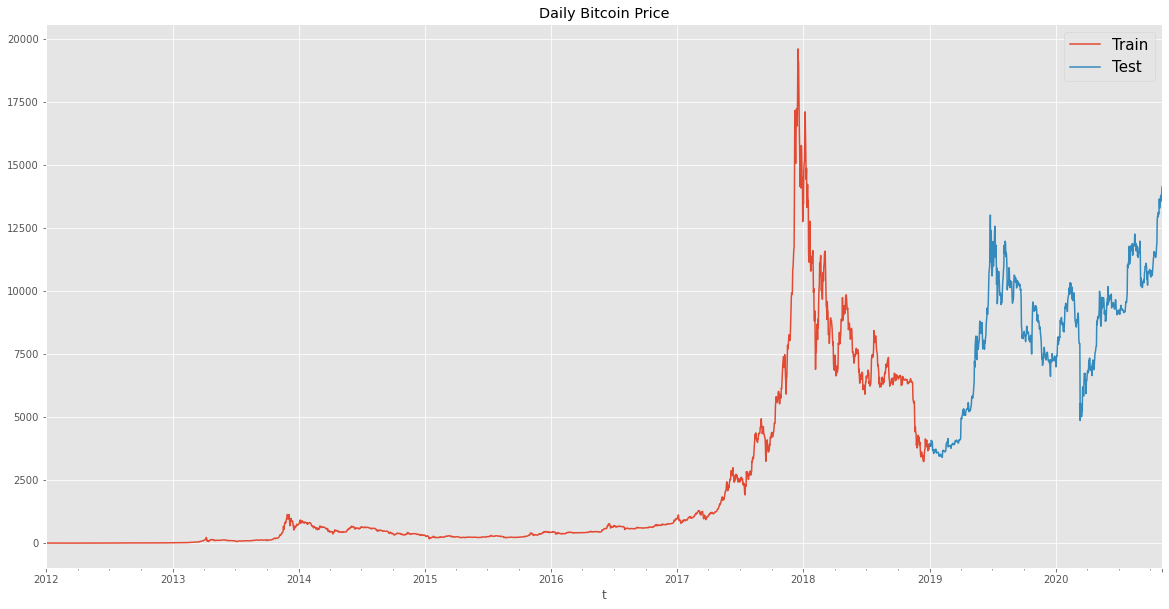

In [268]:
train.plot(label = 'Train')
test.plot(figsize=(20,10),  title= 'Daily Bitcoin Price', label = 'Test')
plt.legend(fontsize = 15);

In [269]:
# Baseline

In [270]:
import sktime
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.datasets import load_airline
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.ets import AutoETS
from sktime.utils.plotting.forecasting import plot_ys
from sklearn.metrics import mean_absolute_error as mae

In [271]:
df2 = pd.concat([train, test])

In [272]:
df2 = df2.reset_index(drop=True)

In [273]:
df2[df2 == 0]

Series([], Name: market_price_usd_close, dtype: float64)

In [278]:
train= df2.iloc[:2557]
test = df2.iloc[2557:]

In [279]:
train, test

(0          5.278399
 1          5.216780
 2          4.883428
 3          5.587490
 4          6.982925
            ...     
 2552    3659.309902
 2553    3926.329136
 2554    3827.777300
 2555    3867.272361
 2556    3741.296795
 Name: market_price_usd_close, Length: 2557, dtype: float64,
 2557     3840.959249
 2558     3943.289843
 2559     3836.558048
 2560     3858.238280
 2561     3841.061170
             ...     
 3226    13779.026946
 3227    13712.179227
 3228    13558.759568
 3229    13914.806921
 3230    14127.434501
 Name: market_price_usd_close, Length: 674, dtype: float64)

In [280]:
naive_model_last = NaiveForecaster(strategy='last')
naive_model_last.fit(train)
y_last_preds = naive_model_last.predict(list(range(1, len(test)+1)))

In [281]:
naive_model_mean = NaiveForecaster(strategy='mean')
naive_model_mean.fit(train)
y_mean_preds = naive_model_mean.predict(list(range(1, len(test)+1)))

In [282]:
naive_model_season = NaiveForecaster(strategy='last', sp=364)
naive_model_season.fit(train)
y_season_preds = naive_model_season.predict(list(range(1, len(test)+1)))

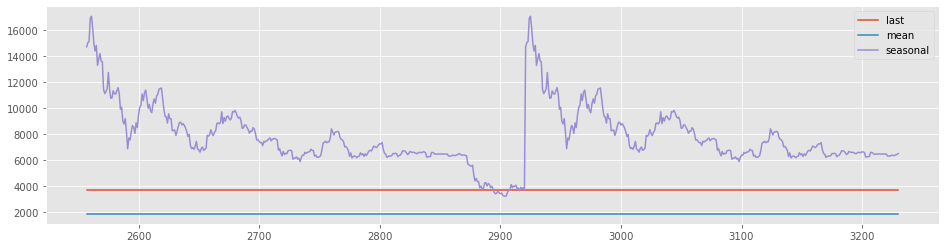

In [283]:
plot_ys(y_last_preds, y_mean_preds, y_season_preds, labels=['last', 'mean', 'seasonal']);

In [284]:
mae_naive_last = mae(test, y_last_preds)
mae_naive_last

4647.39773670894

In [285]:
mae_naive_mean = mae(test, y_mean_preds)
mae_naive_mean

6499.34134659185

In [286]:
mae_naive_seasonal = mae(test, y_season_preds)
mae_naive_seasonal

3464.2422170446016

In [287]:
# Holt Winters

In [288]:
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing

In [324]:
hw = ExponentialSmoothing(
    train,
    seasonal_periods=52,
    trend='mul',
    seasonal='add').fit()

In [325]:
hw.summary()

Dep. Variable:,market_price_usd_close,No. Observations:,2557
Model:,ExponentialSmoothing,SSE,104676592.340
Optimized:,True,AIC,27266.819
Trend:,Multiplicative,BIC,27594.228
Seasonal:,Additive,AICC,27269.558
Seasonal Periods:,52,Date:,"Thu, 12 Nov 2020"
Box-Cox:,False,Time:,10:50:27
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
smoothing_trend,0.0001,beta,True


In [326]:
preds = hw.forecast(len(test))
preds

2557    3729.503604
2558    3717.068662
2559    3704.405566
2560    3691.503954
2561    3679.098280
           ...     
3226    -628.236076
3227    -630.358195
3228    -631.852806
3229    -634.608633
3230    -637.540652
Length: 674, dtype: float64

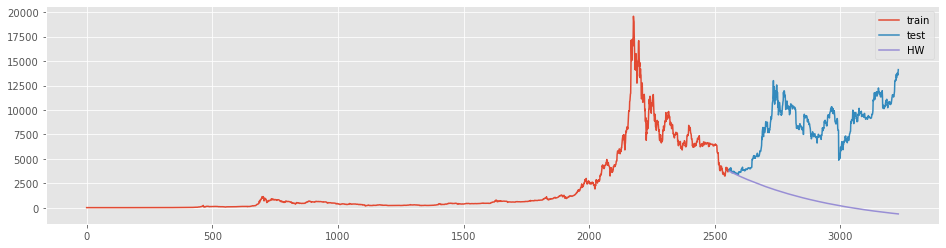

In [327]:
plot_ys(train, test, preds, labels=['train', 'test', 'HW']);

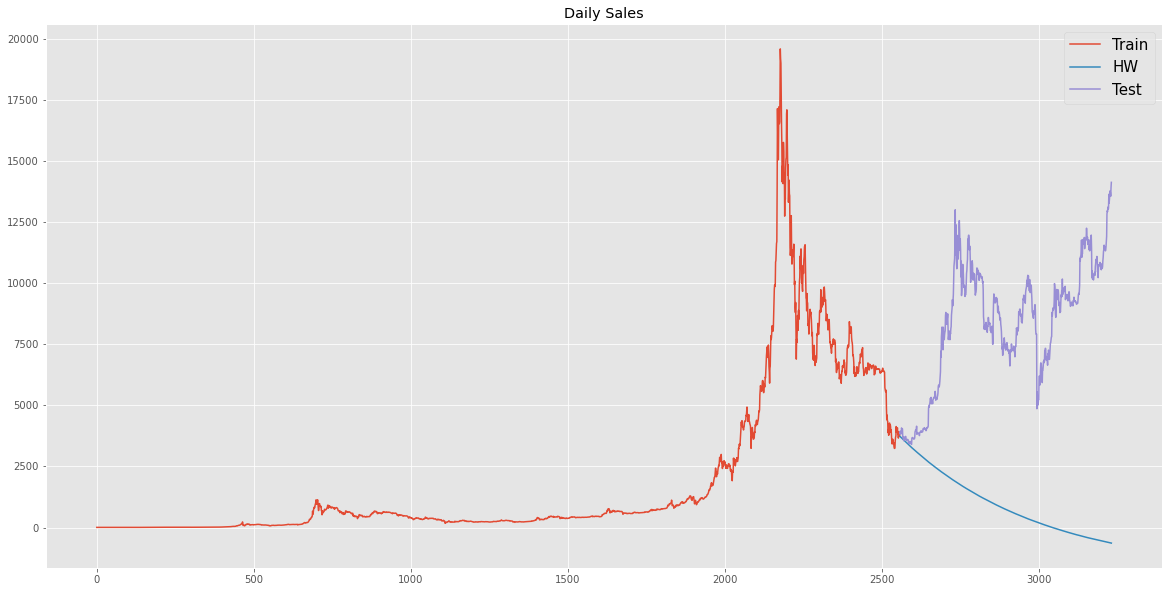

In [328]:
train.plot(label = 'Train')
# y_season_preds.plot(label = 'seasonal')
# y_last_preds.plot(label = 'last')
# y_mean_preds.plot(label='mean')
preds.plot(label='HW')
test.plot(figsize=(20,10),  title= 'Daily Sales', label = 'Test')
plt.legend(fontsize = 15);

In [294]:
mae_hw = mae(test, preds)
mae_hw

7910.9112845436875

In [295]:
# Seasonality

In [296]:
from statsmodels.tsa.seasonal import seasonal_decompose

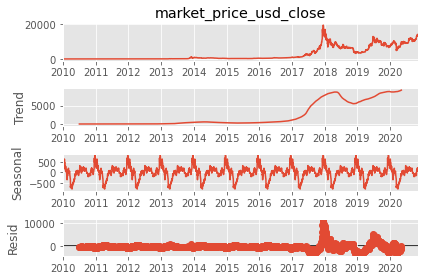

In [297]:
seasonal_decompose(df['market_price_usd_close'], period=364).plot();

In [298]:
# SARIMA 

In [299]:
# Line of best fit

In [300]:
X = pd.to_numeric(df.index)
X = X.to_numpy().reshape(-1, 1)
y = df['market_price_usd_close']

In [301]:
lr = LinearRegression()

In [302]:
lr.fit(X, y)
preds = lr.predict(X)

In [303]:
preds

array([-2613.09992514, -2610.45027132, -2607.80061749, ...,
        7874.22992228,  7876.87957611,  7879.52922993])

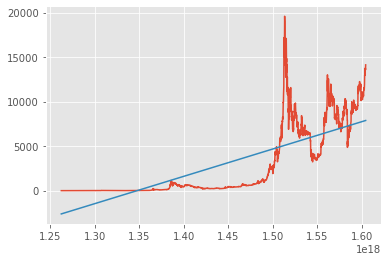

In [304]:
plt.plot(X, y)
plt.plot(X, preds);

In [305]:
detrended = y - preds

# subtract the trend to not have a trendZ

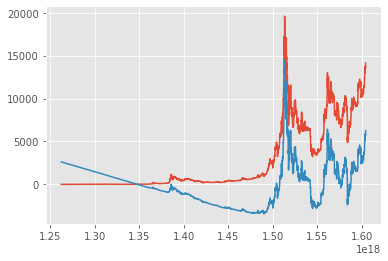

In [306]:
plt.plot(X, y)
plt.plot(X, detrended);

In [307]:
sarima_model = AutoARIMA(sp=12, suppress_warnings=True)
sarima_model.fit(train)

AutoARIMA(sp=12, suppress_warnings=True)

In [308]:
y_sarima = sarima_model.predict(np.arange(len(test)) + 1)

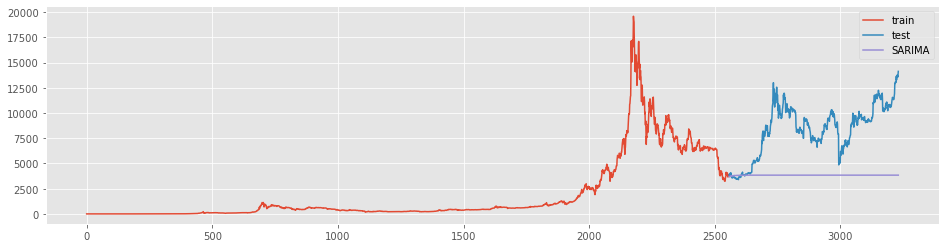

In [309]:
plot_ys(train, test, y_sarima, labels=['train', 'test', 'SARIMA']);

In [310]:
mae_sarima = mae(test, y_sarima)
mae_sarima

4556.059335837061

In [311]:
print('Last:', mae_naive_last, "\n"
      'Mean:', mae_naive_mean, "\n"
      'Seasonal:', mae_naive_seasonal, "\n"
     'Holt Winter:', mae_hw, "\n"
      'SARIMA:', mae_sarima)

Last: 4647.39773670894 
Mean: 6499.34134659185 
Seasonal: 3464.2422170446016 
Holt Winter: 7910.9112845436875 
SARIMA: 4556.059335837061


In [312]:
import pmdarima as pmd

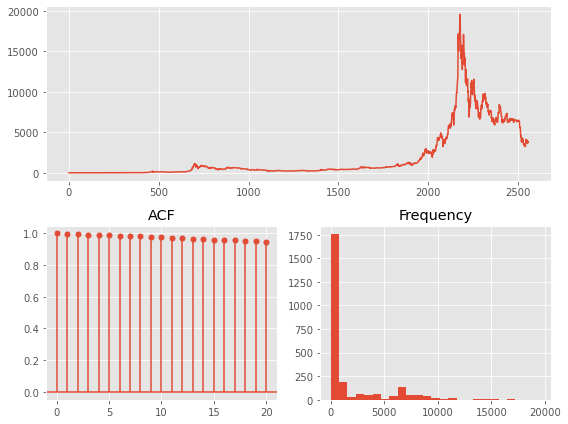

In [313]:
from pmdarima.utils import tsdisplay
tsdisplay(train, lag_max=20)

In [314]:
model = pmd.auto_arima(train, m = 52, suppress_warning = True, trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[52] intercept   : AIC=34378.127, Time=38.94 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=34395.487, Time=1.38 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=34383.973, Time=4.37 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=34383.421, Time=4.58 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=34393.620, Time=0.03 sec
 ARIMA(2,1,2)(0,0,1)[52] intercept   : AIC=34376.412, Time=36.47 sec
 ARIMA(2,1,2)(0,0,0)[52] intercept   : AIC=34374.728, Time=2.35 sec
 ARIMA(2,1,2)(1,0,0)[52] intercept   : AIC=34376.410, Time=39.90 sec
 ARIMA(1,1,2)(0,0,0)[52] intercept   : AIC=34384.999, Time=0.30 sec
 ARIMA(2,1,1)(0,0,0)[52] intercept   : AIC=34384.826, Time=0.19 sec
 ARIMA(3,1,2)(0,0,0)[52] intercept   : AIC=34376.846, Time=2.32 sec
 ARIMA(2,1,3)(0,0,0)[52] intercept   : AIC=34305.502, Time=2.63 sec
 ARIMA(2,1,3)(1,0,0)[52] intercept   : AIC=34306.337, Time=44.07 sec
 ARIMA(2,1,3)(0,0,1)[52] intercept   : AIC=34306.375, Time=45.99 sec


In [315]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2557
Model:               SARIMAX(2, 1, 3)   Log Likelihood              -17145.802
Date:                Wed, 11 Nov 2020   AIC                          34303.604
Time:                        23:00:43   BIC                          34338.681
Sample:                             0   HQIC                         34316.324
                               - 2557                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6361      0.008   -203.400      0.000      -1.652      -1.620
ar.L2         -0.9276      0.007   -127.055      0.000      -0.942      -0.913
ma.L1          1.7433      0.009    193.121      0.000       1.726       1.761
ma.L2          1.0716      0.012     88.741      0.000       1.048       1.095
ma.L3          0.1014      0.006     17.757      0.000       0.090       0.113
sigma2      3.999e+04    264.641    151.096      0.000    3.95e+04    4.05e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            254319.42
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):             187.99   Skew:                             1.44
Prob(H) (two-sided):                  0.00   Kurtosis:                        51.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [323]:
sarima_auto_preds = model.predict(test.shape[0])

In [317]:
sarima_auto_preds = pd.Series(sarima_auto_preds)

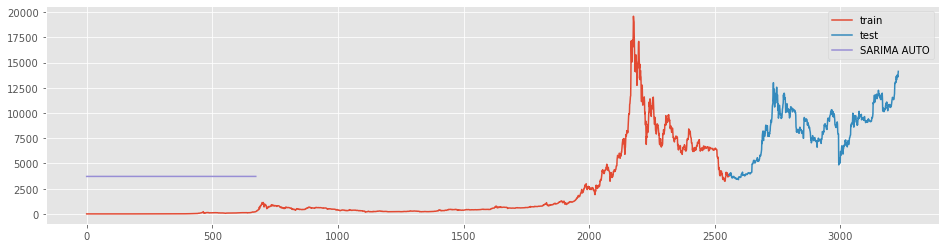

In [318]:
plot_ys(train, test, sarima_auto_preds, labels=['train', 'test', 'SARIMA AUTO']);

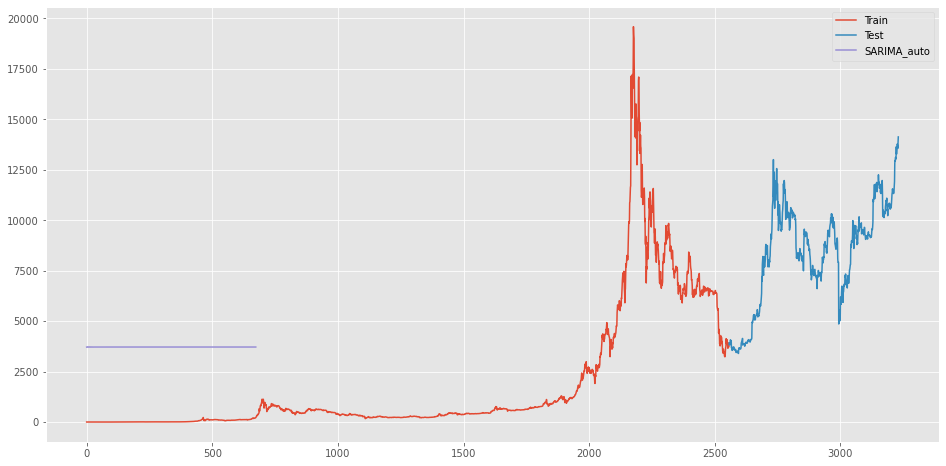

In [319]:
plt.figure(figsize=(16,8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(sarima_auto_preds, label='SARIMA_auto')
plt.legend(loc='best');

In [321]:
mae_sarima_auto = np.round(mae(test, sarima_auto_preds), 0)
mae_sarima_auto

4666.0

In [ ]:
# SARIMAX - exogenous variables

In [ ]:
# Time-Series
# SARIMA, SARIMAX // ARIMA, ARIMAX

# Recurrent Neural Net

# Bayesian Model (facebook prophet library)

In [ ]:
# sktime